In [1]:
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

In [2]:
def sigmoid(x):
    return 1. / (1 + np.exp(-x))

X_all_sig = np.arange(-10, 10, 0.05)
print X_all_sig.shape

X_sig = np.random.choice(X_all_sig, 100)
y_sig = sigmoid(X_sig)

(400,)


In [3]:
gp = GaussianProcessRegressor(kernel=RBF())

/Users/varundn/anaconda/lib/python2.7/site-packages/sklearn/gaussian_process/gpr.py:339: RuntimeWarning: covariance is not positive-semidefinite.
  y_samples = rng.multivariate_normal(y_mean, y_cov, n_samples).T


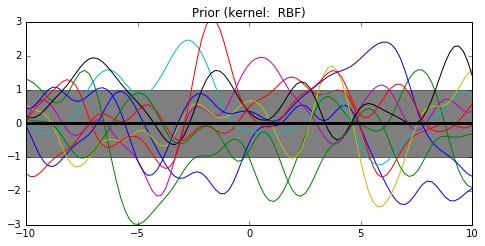

In [4]:
# Plot prior
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
X_ = np.linspace(-10, 10, 100)
y_mean, y_std = gp.predict(X_[:, np.newaxis], return_std=True)
plt.plot(X_, y_mean, 'k', lw=3, zorder=9)
plt.fill_between(X_, y_mean - y_std, y_mean + y_std,
                 alpha=0.5, color='k')
y_samples = gp.sample_y(X_[:, np.newaxis], 10)
plt.plot(X_, y_samples, lw=1)
plt.xlim(-10, 10)
plt.ylim(-3, 3)
plt.title("Prior (kernel:  %s)" % 'RBF', fontsize=12)

In [5]:
gp.fit(X_sig.reshape(-1, 1), y_sig)

/Users/varundn/anaconda/lib/python2.7/site-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.10268334]), 'nit': 7, 'funcalls': 81}
  " state: %s" % convergence_dict)


GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
             kernel=RBF(length_scale=1), n_restarts_optimizer=0,
             normalize_y=False, optimizer='fmin_l_bfgs_b',
             random_state=None)

/Users/varundn/anaconda/lib/python2.7/site-packages/sklearn/gaussian_process/gpr.py:308: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


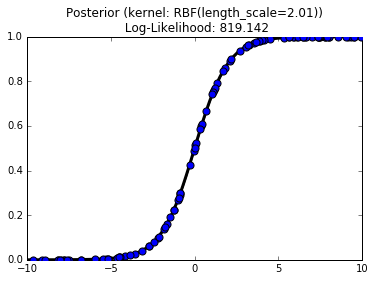

In [6]:
# Plot posterior
X_ = np.linspace(-10, 10, 100)
y_mean, y_std = gp.predict(X_[:, np.newaxis], return_std=True)
plt.plot(X_, y_mean, 'k', lw=3, zorder=9)
plt.fill_between(X_, y_mean - y_std, y_mean + y_std,
                 alpha=0.5, color='k')

y_samples = gp.sample_y(X_[:, np.newaxis], 10)
plt.plot(X_, y_samples, lw=1)
plt.scatter(X_sig, y_sig, c='b', s=50, zorder=10)
plt.xlim(-10, 10)
plt.ylim(0, 1)
plt.title("Posterior (kernel: %s)\n Log-Likelihood: %.3f"
          % (gp.kernel_, gp.log_marginal_likelihood(gp.kernel_.theta)),
          fontsize=12)

In [7]:
gp.kernel_.theta

array([ 0.69571917])